# FEATURE SELECTION - CHI SQUARE METHOD

The chisquare score is computed with non negative features that is categorical features and target variable for the classification task

Basically it is the test for independence which is one of the type of chi square test

In [166]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [94]:
df=sns.load_dataset('titanic')

Titanic dataset is choosed because it comes under classification problem statement

In [95]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [96]:
df.shape

(891, 15)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## Handling missing values

In [98]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [99]:
df['age']=df['age'].fillna(df['age'].median())

In [100]:
df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0])

In [101]:
df['embark_town']=df['embark_town'].fillna(df['embark_town'].mode()[0])

In [102]:
df.drop(['deck'],axis=1,inplace=True)

In [103]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

## Handling categorical features

In [104]:
df1=df.select_dtypes(include=['object','bool'])

In [105]:
df1.head()

,sex,embarked,who,adult_male,embark_town,alive,alone
0,male,S,man,True,Southampton,no,False
1,female,C,woman,False,Cherbourg,yes,False
2,female,S,woman,False,Southampton,yes,True
3,female,S,woman,False,Southampton,yes,False
4,male,S,man,True,Southampton,no,True


In [106]:
from sklearn.preprocessing import LabelEncoder

In [112]:
df1['sex']=LabelEncoder().fit_transform(df1['sex'])
df1['embarked']=LabelEncoder().fit_transform(df1['embarked'])
df1['who']=LabelEncoder().fit_transform(df1['who'])
df1['adult_male']=LabelEncoder().fit_transform(df1['adult_male'])
df1['embark_town']=LabelEncoder().fit_transform(df1['embark_town'])
df1['alive']=LabelEncoder().fit_transform(df1['alive'])
df1['alone']=LabelEncoder().fit_transform(df1['alone'])

In [113]:
df1.head()

,sex,embarked,who,adult_male,embark_town,alive,alone
0,1,2,1,1,2,0,0
1,0,0,2,0,0,1,0
2,0,2,2,0,2,1,1
3,0,2,2,0,2,1,0
4,1,2,1,1,2,0,1


## Feature selection

<AxesSubplot:>

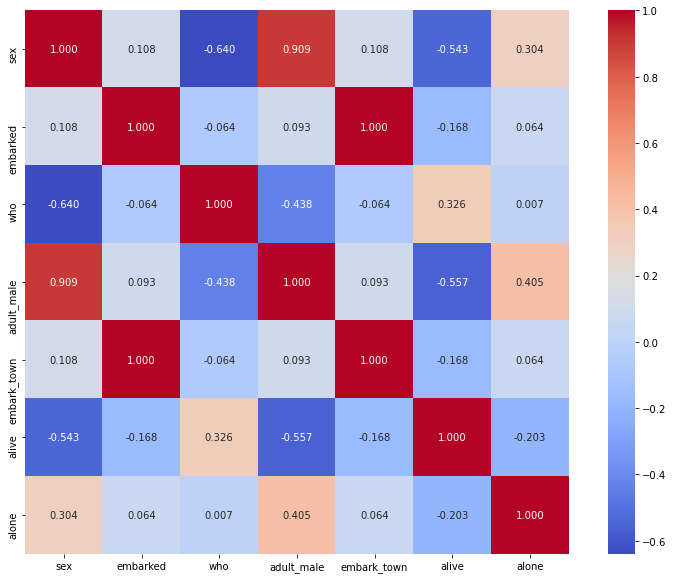

In [167]:
plt.figure(figsize=(14,10))
sns.heatmap(df1.corr(method="pearson"),annot=True,square= True,fmt='.3f',cmap= 'coolwarm')

In [168]:
def cor(d,threshold):
    col_corr=set()
    cmatrix=d.corr(method="pearson")
    for i in range(len(d.columns)):
        for j in range(i):
            if(cmatrix.iloc[i,j]>threshold):
                col=cmatrix.columns[i]
                col_corr.add(col)
    return col_corr  

In [170]:
c=cor(df1,0.90)
c

{'adult_male', 'embark_town'}

In [171]:
df1.drop(['adult_male','embark_town'],axis=1,inplace=True)

## TRAIN TEST SPLIT TO AVOID OVERFITTING

In [172]:
t=df1.drop('alive',axis=1)

In [173]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(t,df1['alive'],test_size=0.3,random_state=0)

In [174]:
X_train.head()

,sex,embarked,who,alone
857,1,2,1,1
52,0,0,2,0
386,1,2,0,0
124,1,2,1,0
578,0,0,2,0


In [175]:
X_train.isnull().sum()

sex         0
embarked    0
who         0
alone       0
dtype: int64

In [176]:
from sklearn.feature_selection import chi2
fscore,p_values=chi2(X_train,y_train)
print(fscore)
print(p_values)

[63.55447864  6.6899483  19.79291931  9.03328564]
[1.55992554e-15 9.69580169e-03 8.63017903e-06 2.65107556e-03]


In [179]:
p_values_series=pd.Series(p_values)
p_values_series.index=X_train.columns
p_values_series

sex         1.559926e-15
embarked    9.695802e-03
who         8.630179e-06
alone       2.651076e-03
dtype: float64

In [180]:
p_values.sort()

In [181]:
p_values

array([1.55992554e-15, 8.63017903e-06, 2.65107556e-03, 9.69580169e-03])

sex column is very important feature. it means we should not delete this feature at any cost

Lesser the p value important the feature.